### Feature Selection Techniques

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv("mobile_dataset.csv")

In [3]:
df.shape

(2000, 21)

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
X = df.drop("price_range",axis=1)
y = df["price_range"]

In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

### Univariate Selection

**SelectKBest**

In [10]:
ordered_rank_features = SelectKBest(chi2,k=20)
ordered_feature = ordered_rank_features.fit(X,y)

In [11]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x0000018A8753FAF0>)

In [12]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [13]:
features_rank =  pd.Series(ordered_feature.scores_,X.columns)
features_rank 

battery_power     14129.866576
blue                  0.723232
clock_speed           0.648366
dual_sim              0.631011
fc                   10.135166
four_g                1.521572
int_memory           89.839124
m_dep                 0.745820
mobile_wt            95.972863
n_cores               9.097556
pc                    9.186054
px_height         17363.569536
px_width           9810.586750
ram              931267.519053
sc_h                  9.614878
sc_w                 16.480319
talk_time            13.236400
three_g               0.327643
touch_screen          1.928429
wifi                  0.422091
dtype: float64

In [14]:
features_rank.sort_values(ascending=False)

ram              931267.519053
px_height         17363.569536
battery_power     14129.866576
px_width           9810.586750
mobile_wt            95.972863
int_memory           89.839124
sc_w                 16.480319
talk_time            13.236400
fc                   10.135166
sc_h                  9.614878
pc                    9.186054
n_cores               9.097556
touch_screen          1.928429
four_g                1.521572
m_dep                 0.745820
blue                  0.723232
clock_speed           0.648366
dual_sim              0.631011
wifi                  0.422091
three_g               0.327643
dtype: float64

**Feature Importance**

This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [15]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [16]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [17]:
model.feature_importances_

array([0.05999958, 0.01958347, 0.03373717, 0.02037975, 0.0339434 ,
       0.01732835, 0.03584848, 0.0342276 , 0.03624412, 0.03388434,
       0.03287467, 0.04701102, 0.04769087, 0.39180181, 0.03356715,
       0.03403291, 0.03452634, 0.01457728, 0.01838865, 0.02035305])

In [18]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features

battery_power    0.060000
blue             0.019583
clock_speed      0.033737
dual_sim         0.020380
fc               0.033943
four_g           0.017328
int_memory       0.035848
m_dep            0.034228
mobile_wt        0.036244
n_cores          0.033884
pc               0.032875
px_height        0.047011
px_width         0.047691
ram              0.391802
sc_h             0.033567
sc_w             0.034033
talk_time        0.034526
three_g          0.014577
touch_screen     0.018389
wifi             0.020353
dtype: float64

In [19]:
ranked_features.nlargest(10)

ram              0.391802
battery_power    0.060000
px_width         0.047691
px_height        0.047011
mobile_wt        0.036244
int_memory       0.035848
talk_time        0.034526
m_dep            0.034228
sc_w             0.034033
fc               0.033943
dtype: float64

<AxesSubplot:>

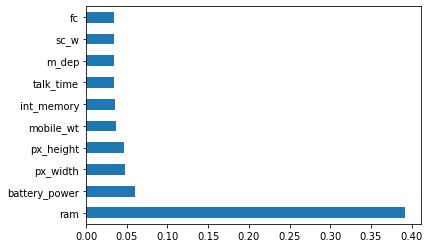

In [20]:
ranked_features.nlargest(10).plot(kind="barh")

**Correlation**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

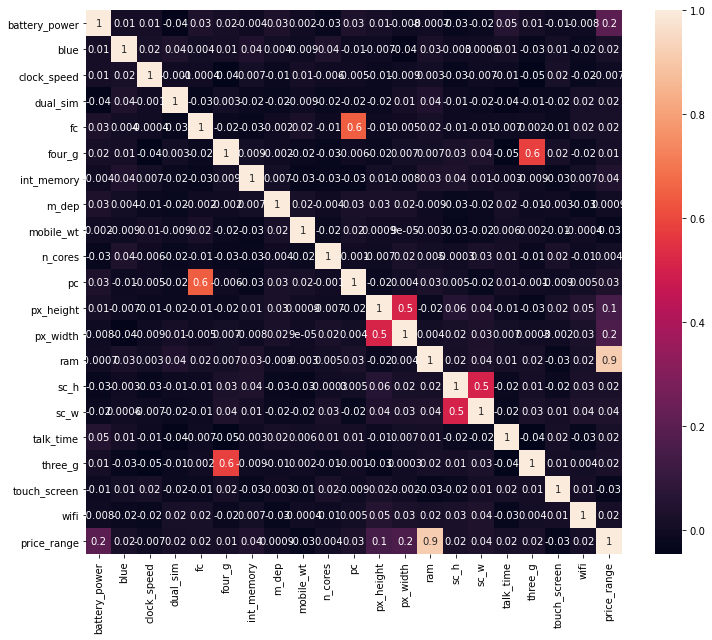

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt=".1g")

Remove The correlated features

In [24]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
correlation(df.iloc[:,:-1],0.8)

set()

**Information Gain**

In [26]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import mutual_info_classif

In [27]:
mi = mutual_info_classif(X,y)
mi

array([0.03320023, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00577042, 0.        , 0.03619302, 0.        ,
       0.00366953, 0.0269012 , 0.02897756, 0.84592825, 0.        ,
       0.        , 0.        , 0.        , 0.01685593, 0.00282513])

In [28]:
score = pd.Series(mi,index=X.columns)
score.sort_values(ascending=False)

ram              0.845928
mobile_wt        0.036193
battery_power    0.033200
px_width         0.028978
px_height        0.026901
touch_screen     0.016856
int_memory       0.005770
pc               0.003670
wifi             0.002825
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
m_dep            0.000000
three_g          0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
blue             0.000000
n_cores          0.000000
dtype: float64